In [1]:
import numpy as np
import pandas as pd
from main_knapsack_functions import *
from logreg_functions import *

In [2]:
training_corr = pd.read_csv("/Users/nedimozden/Desktop/CMOR-Research/CMOR_Research/Code/training_corr.csv")
training_corr

,node_id,parent_id,depth,visit_idx,open_nodes_count,branch_parent_var,branch_parent_dir,branch_parent_value,lp_objective,num_frac,...,x1,x2,x3,x4,x5,x6,instance_id,num_items,m_constraints,x7
0,0,NaN,0,0,0,NaN,NaN,NaN,279.083666,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,7,1,NaN
1,2,0.0,1,1,1,1.0,up,0.466667,277.730701,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,0,7,1,NaN
2,4,2.0,2,2,2,2.0,up,0.333333,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,0,7,1,NaN
3,3,2.0,2,3,1,2.0,down,0.333333,276.647100,1.0,...,1.0,0.0,NaN,NaN,NaN,NaN,0,7,1,NaN
4,6,3.0,3,4,2,0.0,up,0.200000,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,0,7,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157515,1,0.0,1,14,0,0.0,down,0.473684,564.940479,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4999,5,1,NaN
157516,16,1.0,2,15,1,1.0,up,0.333333,562.791248,1.0,...,1.0,NaN,NaN,NaN,NaN,NaN,4999,5,1,NaN
157517,18,16.0,3,16,2,2.0,up,0.909091,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,4999,5,1,NaN
157518,17,16.0,3,17,1,2.0,down,0.909091,559.029034,0.0,...,1.0,0.0,NaN,NaN,NaN,NaN,4999,5,1,NaN


In [3]:
clf, metrics, data = train_logreg(training_corr)
print(metrics)

[node] missing cols dropped (13): ['slack', 'num_fixed', 'num_fixed_1', 'num_fixed_0', 'fix_ratio', 'total_weight_fixed_1', 'total_value_fixed_1', 'frac_var_index', 'frac_var_normalized', 'frac_var_weight', 'frac_var_value', 'frac_var_ratio', 'frac_var_fraction']
[path] missing cols dropped (2): ['branch_parent_weight', 'branch_parent_ratio']
[global] missing cols dropped (4): ['incumbent_val', 'has_incumbent', 'node_gap', 'node_rel_gap']
Final X shape: (157520, 7)
Numeric cols: ['depth', 'lp_objective', 'branch_parent_var', 'branch_parent_value', 'visit_idx', 'open_nodes_count']
Categorical cols: ['branch_parent_dir']
{'roc_auc': 0.8704267804612538, 'accuracy': 0.7799096120851989, 'f1': 0.47840531561461797}


/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: divide by zero encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: overflow encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning: invalid value encountered in matmul
  raw_prediction = X @ weights + intercept
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: divide by zero encountered in matmul
  grad[:n_features] = X.T @ grad_pointwise + l2_reg_strength * weights
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning: overflow encou

In [4]:
X_train, X_test, y_train, y_test = data[0], data[1], data[2], data[3]

coef_df = inspect_logreg_coefficients(clf, X_train)

                  feature      coef
0                   depth -1.697519
1    branch_parent_dir_up -0.518685
2     branch_parent_value -0.142246
3  branch_parent_dir_down -0.090900
4               visit_idx  0.090880
5            lp_objective -0.062092
6       branch_parent_var -0.014500
7        open_nodes_count  0.007811


In [5]:
probs, preds = prediction_distribution(clf, X_test)

Proportion predicted 1: 0.2932794911495167


/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/nedimozden/.pyenv/versions/cmor441/lib/python3.10/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


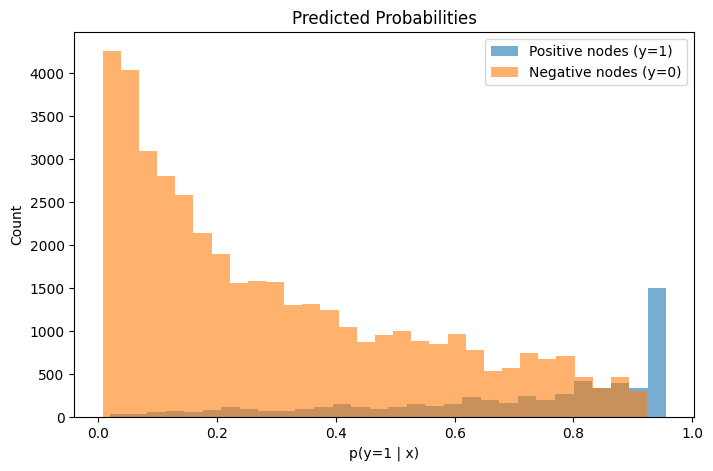

In [6]:
import matplotlib.pyplot as plt

def plot_probability_histogram(probs, y_test):
    plt.figure(figsize=(8,5))
    plt.hist(probs[y_test==1], bins=30, alpha=0.6, label="Positive nodes (y=1)")
    plt.hist(probs[y_test==0], bins=30, alpha=0.6, label="Negative nodes (y=0)")
    plt.legend()
    plt.title("Predicted Probabilities")
    plt.xlabel("p(y=1 | x)")
    plt.ylabel("Count")
    plt.show()

plot_probability_histogram(probs, y_test)

In [7]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print(cm)


[[32451  9193]
 [ 1326  4824]]
